## 랜덤 포레스트
- Decision Tree (나무 1개)
  + 여러개 심음
  + 샘플링
  + Feature Importances
- 예측해야 할 행의 갯수, 100만개
- 컬럼의 갯수 200개 --> 100개
  + 나무 100개를 심고 평균을 내자
  + 나무 1개 당 컬럼을 10개로 
  + T1 mae : 20 / T2 mae : 30 / T3 mae 10, .... 
    + T1 ~ T100 mae :  20
    + feature importances
  + 샘플링 : 부트스트랩 샘플 (복원 추출)

In [ ]:
# 라이브러리 불러오기 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# 데이터 불러오기
wine = pd.read_csv('https://bit.ly/wine_csv_data')


In [ ]:
# input, target 분리 
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()


In [ ]:
# 훈련데이터, 테스트 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42
)

In [ ]:
# 모델링
rf = RandomForestClassifier(n_jobs=-1, random_state = 42) #n_jobs=-1 : 시스템에 있는 모든 코어를 사용

In [ ]:
# 모형 평가
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs =-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9973541965122431 0.8905151032797809


In [ ]:
# 특성 중요
rf.fit(train_input, train_target)
# print(rf.feature_importances_)
print(rf.feature_importances_)


[0.23167441 0.50039841 0.26792718]


In [ ]:
# OOB 
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 그레이디언트 부스팅
- 경사하강법의 원리를 이용함. 
- T1 ~ TN 증가하면서 오차를 보정해주며 정확성을 높임
- 랜덤포레스트와의 차이점 
  + 랜덤포레스트는 각 나무간 상호 연관성 없음
  + 부스팅은 각 나무간 상호 연관성 있음
- 단점
  + 속도가 너무 느려요
- 대안
  + XGBoost, LightGBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


- 특성 중요도

In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


 p318
## 주성분 분석
- 이론적으로 어려움
- 좌표계 공간 개념
- 직교 + 회전
- 공분산 등(통계관련내용)
- Feature Engineering 기법
- StandardScaler()
- 현 ML의 문제점 : 컬럼의 갯수 매우 많음
- 차원축소
 + 특성이 많으면 훈련데이터에 쉽게 과대적합된다
 + 특성을 줄여서 학습모델의 성능을 향상시킨다
 + 모델의 학습시간을 감소시켜준다
 + 대표적인 방법론 중 하나가 PCA, EFA

- PCA vs EFA
 + EFA(탐색적 요인 분석), Factor Analysis
  - 예) 국어, 수학, 과학, 영어
  - 예) 국어40, 수학100, 과학100, 영어30 / 위 학생은 언어영역은 수준이 낮은 편이나 수리영역은 매우 수준이 높습니다
  - 예) 범주형 & 수치데이터
 + PCA(주성분분석)
  - 장비1, 장비2, 장비3, 장비4, ....
  - PC1, PC2, PC3, ....PCN
  - 원래 가지고 있던 정보를 알 수 없음(정보손실)
  - 범주형 데이터셋에는 사용 안됨
  - 무조건 수치형 데이터에만 사용
  - PCA 실행 전, 반드시 표준화처리(스케일링 실행)



 p.320

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-07-05 04:58:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-05 04:58:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-05 04:58:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [ ]:
import numpy as np
fruits = np. load('/content/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

fruits_2d.shape

(300, 10000)

- PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

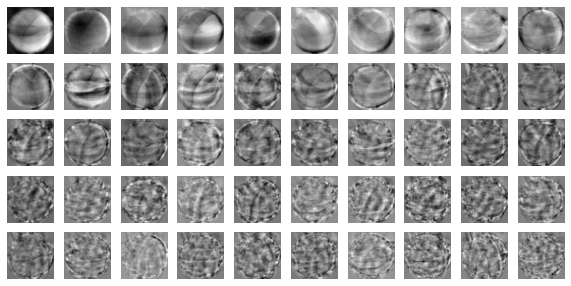

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
# 머신러닝에서 컬럼갯수를 10000개에서 50개로 줄임
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)


(300, 50)



- 훈련데이터, 테스트 데이터 분리

## 설명된 분산
- 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9214955656462601


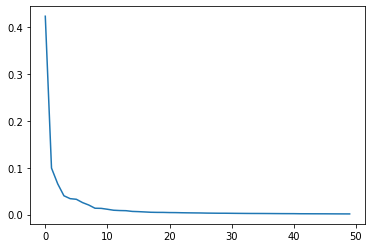

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
print(np.sum(pca.explained_variance_ratio_[:]))

0.9214955656462601
